### Import necessary libraries including datetime, numpy, pandas, matplotlib, seaborn, and sklearn.

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Read the used car dataset from the provided CSV file.

In [2]:
df = pd.read_csv('car.csv')

### Display the first 5 rows of the dataset to get an initial overview.

In [3]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


### Task 3: Exploratory Data Analysis (EDA)
3.1 Remove the index column as it seems redundant.

In [5]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [6]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### 3.2 Explore the distribution of car manufacturers in the dataset. Extract the manufacturer from the 'Name' column and create a new column named 'Manufacturer

In [7]:
df['Manufacturer'] = df.Name.str.split(expand=True)[0]

In [8]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Manufacturer
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi


### Visualize the count of cars based on manufacturers using a countplot.

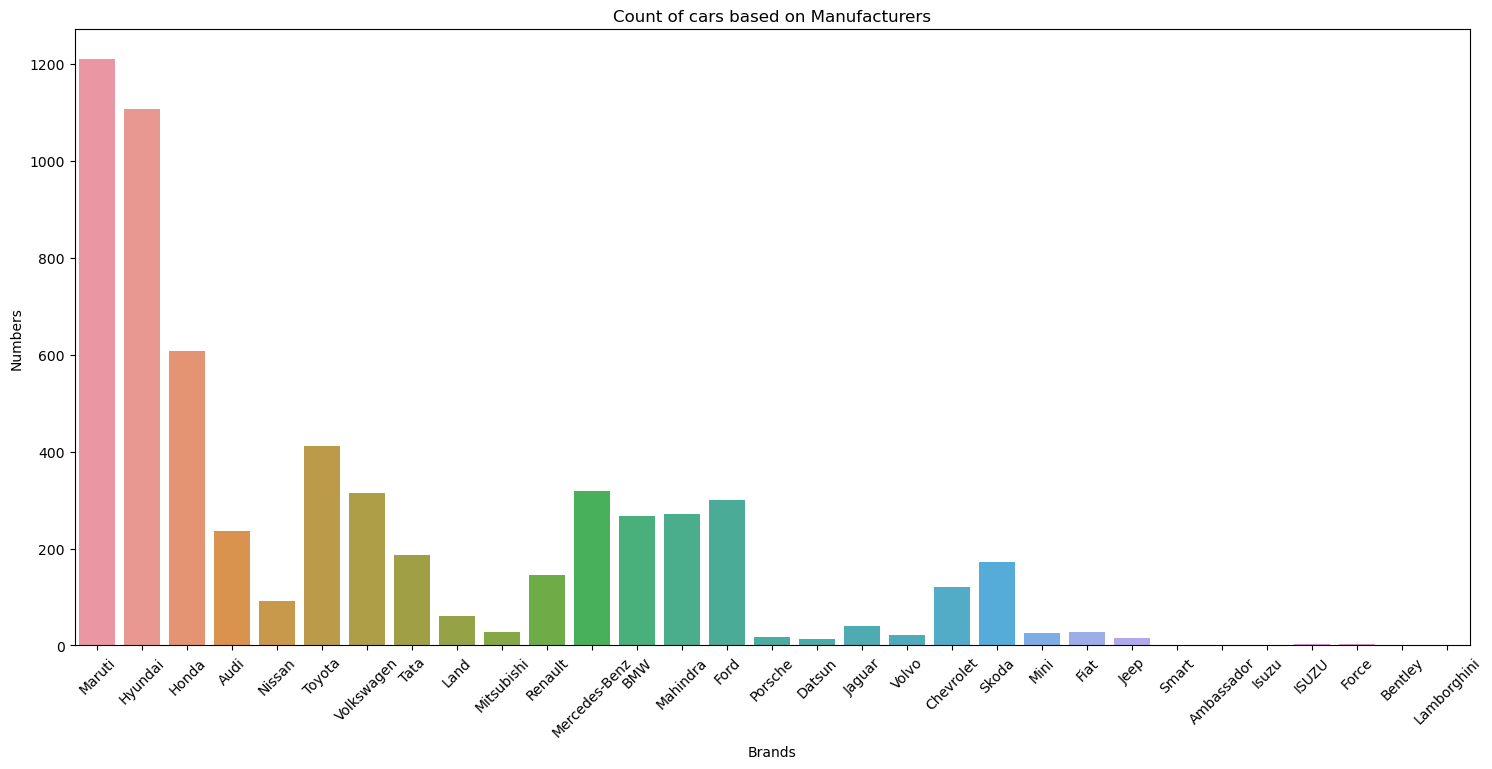

In [9]:
plt.figure(figsize=(18,8))
sns.countplot(x=df.Manufacturer)
plt.title('Count of cars based on Manufacturers')
plt.xticks(rotation=45)
plt.xlabel('Brands')
plt.ylabel('Numbers')
plt.show()

### Drop the 'Name' column as it is no longer needed.

In [10]:
df.drop('Name',axis=1, inplace=True)

In [11]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Manufacturer
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi


### Remove the 'Location' column as it is not expected to significantly influence car prices.

In [12]:
df.drop('Location',axis=1, inplace=True)

In [13]:
df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Manufacturer
0,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti
1,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai
2,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda
3,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti
4,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi


### Task 4: Feature Engineering
4.1 Convert categorical columns ('Fuel_Type', 'Transmission', 'Owner_Type') into dummy variables.

In [14]:
df = pd.get_dummies(data=df, columns=['Fuel_Type', 'Transmission','Owner_Type','Manufacturer'], drop_first=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        6019 non-null   int64  
 1   Kilometers_Driven           6019 non-null   int64  
 2   Mileage                     6017 non-null   object 
 3   Engine                      5983 non-null   object 
 4   Power                       5983 non-null   object 
 5   Seats                       5977 non-null   float64
 6   New_Price                   824 non-null    object 
 7   Price                       6019 non-null   float64
 8   Fuel_Type_Diesel            6019 non-null   uint8  
 9   Fuel_Type_Electric          6019 non-null   uint8  
 10  Fuel_Type_LPG               6019 non-null   uint8  
 11  Fuel_Type_Petrol            6019 non-null   uint8  
 12  Transmission_Manual         6019 non-null   uint8  
 13  Owner_Type_Fourth & Above   6019 

In [20]:
df.drop('Manufacturer_Isuzu',axis=1,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        6019 non-null   int64  
 1   Kilometers_Driven           6019 non-null   int64  
 2   Mileage                     6017 non-null   object 
 3   Engine                      5983 non-null   object 
 4   Power                       5983 non-null   object 
 5   Seats                       5977 non-null   float64
 6   New_Price                   824 non-null    object 
 7   Price                       6019 non-null   float64
 8   Fuel_Type_Diesel            6019 non-null   uint8  
 9   Fuel_Type_Electric          6019 non-null   uint8  
 10  Fuel_Type_LPG               6019 non-null   uint8  
 11  Fuel_Type_Petrol            6019 non-null   uint8  
 12  Transmission_Manual         6019 non-null   uint8  
 13  Owner_Type_Fourth & Above   6019 

In [22]:
df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_Diesel,Fuel_Type_Electric,...,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Smart,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1,0,...,0,0,0,0,0,0,0,0,0,0


### Extract the numerical values from the 'Mileage' column and handle missing values.

In [23]:
df['Mileage'] = df['Mileage'].str.split(expand=True)[0]

In [24]:
df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_Diesel,Fuel_Type_Electric,...,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Smart,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,2010,72000,26.6,998 CC,58.16 bhp,5.0,NaN,1.75,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.2,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.2,1968 CC,140.8 bhp,5.0,NaN,17.74,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df['Mileage'].dtypes

dtype('O')

In [26]:
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

In [27]:
df['Mileage'].dtypes

dtype('float64')

In [28]:
df['Mileage'].isnull().sum()

2

In [29]:
df['Mileage'].fillna(df['Mileage'].mean(),inplace=True) 

In [30]:
df['Mileage'].isnull().sum()

0

In [31]:
df['Mileage'].dtypes

dtype('float64')

In [32]:
df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_Diesel,Fuel_Type_Electric,...,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Smart,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,2010,72000,26.60,998 CC,58.16 bhp,5.0,NaN,1.75,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968 CC,140.8 bhp,5.0,NaN,17.74,1,0,...,0,0,0,0,0,0,0,0,0,0


### Process the 'Engine', 'Power', and 'Seats' columns by removing units, converting to numeric, and handling missing values.

In [33]:
df['Engine'] = df['Engine'].str.split(expand=True)[0]

In [34]:
df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_Diesel,Fuel_Type_Electric,...,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Smart,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,2010,72000,26.60,998,58.16 bhp,5.0,NaN,1.75,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582,126.2 bhp,5.0,NaN,12.50,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199,88.7 bhp,5.0,8.61 Lakh,4.50,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248,88.76 bhp,7.0,NaN,6.00,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968,140.8 bhp,5.0,NaN,17.74,1,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df['Engine'].dtype

dtype('O')

In [36]:
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')

In [37]:
df['Engine'].dtype

dtype('float64')

In [38]:
df['Engine'].isnull().sum()

36

In [39]:
df['Engine'].fillna(df['Engine'].mean(),inplace=True) 

In [40]:
df['Engine'].isnull().sum()

0

In [41]:
df['Engine'].dtype

dtype('float64')

In [42]:
df['Power'] = df['Power'].str.split(expand=True)[0]

In [43]:
df['Power'].dtype

dtype('O')

In [44]:
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

In [45]:
df['Power'].dtype

dtype('float64')

In [46]:
df['Power'].isnull().sum()

143

In [47]:
df['Power'].fillna(df['Power'].mean(),inplace=True) 

In [48]:
df['Power'].isnull().sum()

0

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        6019 non-null   int64  
 1   Kilometers_Driven           6019 non-null   int64  
 2   Mileage                     6019 non-null   float64
 3   Engine                      6019 non-null   float64
 4   Power                       6019 non-null   float64
 5   Seats                       5977 non-null   float64
 6   New_Price                   824 non-null    object 
 7   Price                       6019 non-null   float64
 8   Fuel_Type_Diesel            6019 non-null   uint8  
 9   Fuel_Type_Electric          6019 non-null   uint8  
 10  Fuel_Type_LPG               6019 non-null   uint8  
 11  Fuel_Type_Petrol            6019 non-null   uint8  
 12  Transmission_Manual         6019 non-null   uint8  
 13  Owner_Type_Fourth & Above   6019 

In [51]:
df['Seats'].isnull().sum()

42

In [52]:
df['Seats'].fillna(df['Seats'].mean(),inplace=True) 

In [53]:
df['Seats'].isnull().sum()

0

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        6019 non-null   int64  
 1   Kilometers_Driven           6019 non-null   int64  
 2   Mileage                     6019 non-null   float64
 3   Engine                      6019 non-null   float64
 4   Power                       6019 non-null   float64
 5   Seats                       6019 non-null   float64
 6   New_Price                   824 non-null    object 
 7   Price                       6019 non-null   float64
 8   Fuel_Type_Diesel            6019 non-null   uint8  
 9   Fuel_Type_Electric          6019 non-null   uint8  
 10  Fuel_Type_LPG               6019 non-null   uint8  
 11  Fuel_Type_Petrol            6019 non-null   uint8  
 12  Transmission_Manual         6019 non-null   uint8  
 13  Owner_Type_Fourth & Above   6019 

### Drop the 'New_Price' column due to a high number of missing values.

In [55]:
df.drop('New_Price', axis=1,inplace=True)

In [56]:
df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,...,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Smart,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Task 5: Data Processing
5.1 Normalize Numerical Features.

In [57]:
import datetime

In [58]:
curr_year = datetime.datetime.now().year

In [59]:
df['Car_age'] = curr_year - df.Year

In [60]:
df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,...,Manufacturer_Nissan,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Smart,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Car_age
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,0,0,0,0,13
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,1,0,0,...,0,0,0,0,0,0,0,0,0,8
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,...,0,0,0,0,0,0,0,0,0,12
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,1,0,0,...,0,0,0,0,0,0,0,0,0,11
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,0,0,...,0,0,0,0,0,0,0,0,0,10


In [61]:
df.drop('Year', axis=1,inplace=True)

In [62]:
df.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,...,Manufacturer_Nissan,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Smart,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Car_age
0,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
1,41000,19.67,1582.0,126.20,5.0,12.50,1,0,0,0,...,0,0,0,0,0,0,0,0,0,8
2,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,1,...,0,0,0,0,0,0,0,0,0,12
3,87000,20.77,1248.0,88.76,7.0,6.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,11
4,40670,15.20,1968.0,140.80,5.0,17.74,1,0,0,0,...,0,0,0,0,0,0,0,0,0,10


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
y = df['Price']

In [65]:
X = df.drop('Price',axis=1)

In [66]:
X.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,...,Manufacturer_Nissan,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Smart,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Car_age
0,72000,26.60,998.0,58.16,5.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,13
1,41000,19.67,1582.0,126.20,5.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8
2,46000,18.20,1199.0,88.70,5.0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,12
3,87000,20.77,1248.0,88.76,7.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,11
4,40670,15.20,1968.0,140.80,5.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10


In [67]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
X_train.shape

(4213, 43)

In [69]:
X_test.shape

(1806, 43)

In [70]:
y_train.shape

(4213,)

In [71]:
y_test.shape

(1806,)

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

In [74]:
X_train = scaler.fit_transform(X_train)

In [75]:
X_test = scaler.transform(X_test)

In [76]:
X_train

array([[ 0.51111027,  0.85689938, -0.70246029, ...,  4.23998555,
        -0.0617434 ,  0.74026657],
       [-0.98653885,  0.48304626, -0.70577735, ..., -0.23584986,
        -0.0617434 , -0.80427733],
       [ 0.35263818, -0.66693471,  0.92289991, ..., -0.23584986,
        -0.0617434 , -0.18645977],
       ...,
       [ 2.16486895, -0.66693471,  0.92289991, ..., -0.23584986,
        -0.0617434 ,  0.12244901],
       [ 0.49572769,  1.67238018, -0.20655957, ..., -0.23584986,
        -0.0617434 , -0.18645977],
       [ 1.06236316, -1.1697781 ,  1.44533711, ..., -0.23584986,
        -0.0617434 ,  0.74026657]])

In [77]:
X_test

array([[ 0.30110916,  1.14767404, -0.62119228, ..., -0.23584986,
        -0.0617434 ,  0.12244901],
       [-0.80819541, -0.60134644,  0.6210473 , ..., -0.23584986,
        -0.0617434 , -1.11318611],
       [ 0.74736151, -0.66693471,  0.92289991, ..., -0.23584986,
        -0.0617434 , -0.18645977],
       ...,
       [-0.22914362,  0.20757553, -0.70577735, ..., -0.23584986,
        -0.0617434 , -0.18645977],
       [-0.85140314,  0.00206563, -0.70743588, ..., -0.23584986,
        -0.0617434 , -1.11318611],
       [-1.01139773,  1.89100774, -0.62119228, ..., -0.23584986,
        -0.0617434 , -1.11318611]])

### Task 6: Model Training and Evaluation
6.1 Train a Linear Regression model on the preprocessed training data.

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
model = LinearRegression()

In [80]:
model.fit(X_train, y_train)

LinearRegression()

In [81]:
pred = model.predict(X_test)

In [82]:
pred

array([ 4.36239385, 11.48133312,  9.7479761 , ...,  5.79006318,
        8.60064655,  8.60630827])

### 6.2 Evaluate the performance of the Linear Regression model using the R-squared score on the test set.

In [83]:
from sklearn.metrics import r2_score

In [84]:
r2_score(y_test, pred)

0.7000578139040623

### 6.3 Train a Random Forest Regressor model with 100 estimators on the preprocessed training data.

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
rf_model = RandomForestRegressor()

In [87]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

### Evaluate the performance of the Random Forest Regressor model using the R-squared score on the test set.

In [88]:
rf_predict = rf_model.predict(X_test)

In [89]:
r2_score(y_test, rf_predict)

0.8833000313495166

In [90]:
from sklearn.metrics import mean_squared_error

In [96]:
print("Root mean square for Linear Regression :", np.sqrt(mean_squared_error(y_test,pred)))

Root mean square for Linear Regression : 6.073918732709642


In [97]:
print("Root mean square for Random Forest :", np.sqrt(mean_squared_error(y_test,rf_predict)))

Root mean square for Random Forest : 3.7886594552764215


### Task 7: Conclusion
7.1 Summarize the key findings from the exploration, feature engineering, and model training process.

### 7.2 Discuss the performance of the Linear Regression and Random Forest models.

### 7.3 Provide any insights into the factors influencing used car prices based on the analysis.